In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

* Base com indicadores sociais e econômicos de municípios brasileiros

In [2]:
df = pd.read_csv('municipios.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,taxa_freq_18_24,taxa_freq_25_29,taxa_freq_4_5,taxa_freq_4_6,taxa_freq_5_6,taxa_freq_6,taxa_freq_6_14,taxa_freq_6_17,taxa_freq_fundamental_15_17,taxa_freq_fundamental_18_24,taxa_freq_fundamental_4_5,taxa_freq_medio_18_24,taxa_freq_medio_6_14,taxa_freq_superior_15_17,taxa_fundamental_11_13,taxa_fundamental_12_14,taxa_fundamental_15_17,taxa_fundamental_16_18,taxa_fundamental_18_24,taxa_fundamental_18_mais,taxa_fundamental_25_mais,taxa_medio_18_20,taxa_medio_18_24,taxa_medio_18_mais,taxa_medio_19_21,taxa_medio_25_mais,taxa_superior_25_mais,renda_pc_max_quintil_1,renda_pc_max_quintil_2,renda_pc_max_quintil_3,renda_pc_max_quintil_4,renda_pc_max_decil_9,indice_gini,prop_pobreza_extrema,prop_pobreza_extrema_criancas,prop_pobreza,prop_pobreza_criancas,prop_vulner_pobreza,prop_vulner_pobreza_criancas,prop_renda_10_ricos,prop_renda_20_pobres,prop_renda_20_ricos,prop_renda_40_pobres,prop_renda_60_pobres,prop_renda_80_pobres,prop_renda_trabalho,razao_10_ricos_40_pobres,razao_20_ricos_40_pobres,renda_pc,renda_pc_quintil_1,renda_pc_decil_10,renda_pc_quintil_2,renda_pc_quintil_3,renda_pc_quintil_4,renda_pc_quintil_5,renda_pc_exc_renda_nula,renda_pc_pobreza_extrema,renda_pc_pobreza,renda_pc_vulner_pobreza,indice_theil,prop_trabalhadores_conta_proria,prop_empregadores,prop_ocupados_agropecuaria,prop_ocupados_comercio,prop_ocupados_construcao,prop_ocupados_extracao,prop_ocupados_formalizacao,prop_ocupados_fundamental,prop_ocupados_medio,prop_ocupados_servicos,prop_ocupados_siup,prop_ocupados_superior,prop_ocupados_transformacao,prop_ocupados_renda_0,prop_ocupados_renda_1_sm,prop_ocupados_renda_2_sm,prop_ocupados_renda_3_sm,prop_ocupados_renda_5_sm,renda_media_ocupados,taxa_atividade,taxa_atividade_10_14,taxa_atividade_15_17,taxa_atividade_18_24,taxa_atividade_18_mais,taxa_atividade_25_29,taxa_desocupacao,taxa_desocupacao_10_14,taxa_desocupacao_15_17,taxa_desocupacao_18_24,taxa_desocupacao_18_mais,taxa_desocupacao_25_29,indice_treil_trabalho,taxa_ocupados_carteira,taxa_ocupados_setor_publico,taxa_ocupados_sem_carteira,taxa_agua_encanada,taxa_banheiro_agua_encanada,taxa_densidade_2_mais,taxa_coleta_lixo,taxa_energia_eletrica,taxa_agua_esgoto_inadequados,taxa_paredes_inadequados,taxa_criancas_dom_sem_fund,taxa_criancas_fora_escola_4_5,taxa_criancas_fora_escola_6_14,taxa_dom_sem_fund,taxa_dom_vulner_sem_fund,taxa_sem_fund_informal,taxa_mulheres_com_filho_10_14,taxa_mulheres_com_filho_15_17,taxa_mulheres_chefe_filho_15m,taxa_nest_ntrab_vulner_15_24,taxa_vulner_desloc_1_hora,taxa_dom_vulner_dep_idoso,taxa_sem_energia_eletrica,populacao_homens_0_4,populacao_homens_10_14,populacao_homens_15_19,populacao_homens_20_24,populacao_homens_25_29,populacao_homens_30_34,populacao_homens_35_39,populacao_homens_40_44,populacao_homens_45_49,populacao_homens_50_54,populacao_homens_55_59,populacao_homens_5_9,populacao_homens_60_64,populacao_homens_65_69,populacao_homens_70_74,populacao_homens_75_79,populacao_homens,populacao_homens_80_mais,populacao_mulheres_0_4,populacao_mulheres_10_14,populacao_mulheres_15_19,populacao_mulheres_20_24,populacao_mulheres_25_29,populacao_mulheres_30_34,populacao_mulheres_35_39,popul

* Selecionando algumas variáveis

In [4]:
df = df[['ano','expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]

* Selecionando apenas indicadores de 2010

In [5]:
df = df.loc[df['ano'] == 2010] #selecionando apenas indicadores de 2010

* Verificando se há nulos nas colunas

In [6]:
df.isna().sum()

ano                          0
expectativa_vida             0
expectativa_anos_estudo      0
indice_gini                  0
prop_pobreza_extrema         0
indice_frequencia_escolar    0
dtype: int64

* Observando a média das variáveis escolhidas como explicativas

In [7]:
print(df['expectativa_anos_estudo'].mean())
print(df['indice_gini'].mean())
print(df['prop_pobreza_extrema'].mean())
print(df['indice_frequencia_escolar'].mean())

9.463638814016203
0.494380952380953
11.341415992812218
0.6683439353099748


* Boxplot da variável resposta

<AxesSubplot:xlabel='expectativa_vida'>

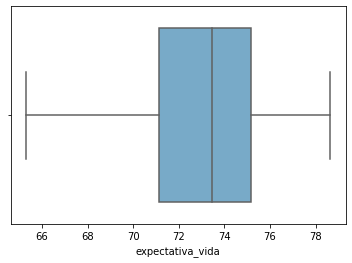

In [8]:
sns.boxplot(x=df["expectativa_vida"], palette="Blues")

* Correlaçao entre as variáveis
    * A principio, há uma correlação significativa entre expectativa de vida com pobreza extrema
    * Com frequência escolar também há uma correlação em relação a expectativa de vida

In [9]:
df[['expectativa_vida','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']].corr('spearman')

,expectativa_vida,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_frequencia_escolar
expectativa_vida,1.000000,0.468071,-0.406924,-0.817240,0.673751
expectativa_anos_estudo,0.468071,1.000000,-0.366153,-0.549676,0.767891
indice_gini,-0.406924,-0.366153,1.000000,0.628764,-0.517690
prop_pobreza_extrema,-0.817240,-0.549676,0.628764,1.000000,-0.765108
indice_frequencia_escolar,0.673751,0.767891,-0.517690,-0.765108,1.000000


* Separando entre variável dependente e independente
* Separando entre treino e teste

In [10]:
X = df[['expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_frequencia_escolar']]
Y = df[['expectativa_vida']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

* Normalização (via Z-score): Transformar as variáveis explicativas p/ variável com média 1 e desvio-padrão 0 (zero)
    * Como a regressão lasso impõe uma penalização no coeficiente da variável, é recomendável padronizar as variáveis explicativas para que suas escalas não influenciem neste termo

In [12]:
# Calculando média e desvio padrao das variáveis explicativas, utilizando a base de treino
M1 = X_train['expectativa_anos_estudo'].mean()
M2 = X_train['indice_gini'].mean()
M3 = X_train['prop_pobreza_extrema'].mean()
M4 = X_train['indice_frequencia_escolar'].mean()
D1 = np.std(X_train['expectativa_anos_estudo'])
D2 = np.std(X_train['indice_gini'])
D3 = np.std(X_train['prop_pobreza_extrema'])
D4 = np.std(X_train['indice_frequencia_escolar'])

In [13]:
#Normalizaçao via Z-score
X_train['expectativa_anos_estudo'] = (X_train['expectativa_anos_estudo'] - M1)/ D1
X_train['indice_gini'] = (X_train['indice_gini'] - M2)/ D2
X_train['prop_pobreza_extrema'] = (X_train['prop_pobreza_extrema'] - M3)/ D3
X_train['indice_frequencia_escolar'] = (X_train['indice_frequencia_escolar'] - M4)/ D4

* Otimização do hiperparâmetro alpha (termo de penalização dos coeficientes)
    * Define-se o range que o hiperparâmetro poderá assumir - de 0,01 até 1, variando em 0,01
    * Para cada iteração que testar um valor de hiperparâmetro, será calculado as métricas de R2 e erro quadrado médio, visando a avaliação posterior de cada modelo

In [14]:
parametro = {'alpha':np.arange(0.01, 1,0.01)} #Definiçao do range que o hiperparâmetro será testado
scoring = {'R2': 'r2', 'Erro Quadrado médio': 'neg_mean_squared_error'} # Métricas de qualidade do modelo a serem calculadas

* Construção do modelo
    * A escolha do melhor hiperparâmetro sera realizado via cross-validation, definindo o valor que resulta no modelo com menor erro quadrado médio (refit = 'Erro Quadrado Médio')

In [15]:
lasso = GridSearchCV(Lasso(max_iter=100000,random_state=0), parametro, scoring = scoring, refit = 'Erro Quadrado médio', 
                     cv=10) #pelo refit define-se qual métrica será referência para escolher o melhor modelo
lasso.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit='Erro Quadrado médio',
             return_train_score=False,
             scoring={'Erro Quadrado médio': 'neg_mean_squared_error',
         

In [16]:
# Melhor modelo tem hiperparametro igual a 0,01 e produz um erro quadrático médio de 2,72 na base de treino (cross-validation)
print(lasso.best_estimator_.alpha)
print(lasso.best_score_)

0.01
-2.7202238232239404


In [17]:
#Inserindo os resultados das iterações do modelo em um dataframe
resultados = lasso.cv_results_
resultados = pd.DataFrame.from_dict(resultados)

In [18]:
pd.set_option('display.max_columns', None)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_Erro Quadrado médio,split1_test_Erro Quadrado médio,split2_test_Erro Quadrado médio,split3_test_Erro Quadrado médio,split4_test_Erro Quadrado médio,split5_test_Erro Quadrado médio,split6_test_Erro Quadrado médio,split7_test_Erro Quadrado médio,split8_test_Erro Quadrado médio,split9_test_Erro Quadrado médio,mean_test_Erro Quadrado médio,std_test_Erro Quadrado médio,rank_test_Erro Quadrado médio
0,0.004975,0.006153,0.001900,0.000301,0.01,{'alpha': 0.01},0.616533,0.649742,0.566771,0.624245,0.629863,0.669412,0.632848,0.641321,0.617076,0.574290,0.622210,0.029926,1,-2.829402,-2.307562,-3.101239,-2.980731,-2.923976,-2.291585,-2.618184,-2.519179,-2.748473,-2.881907,-2.720224,0.264247,1
1,0.002947,0.000080,0.001817,0.000401,0.02,{'alpha': 0.02},0.615277,0.650812,0.566987,0.623670,0.627078,0.668083,0.632510,0.641059,0.615800,0.575469,0.621675,0.029547,2,-2.838670,-2.300514,-3.099691,-2.985290,-2.945977,-2.300796,-2.620594,-2.521019,-2.757629,-2.873928,-2.724411,0.265666,2
2,0.002781,0.000323,0.001510,0.000486,0.03,{'alpha': 0.03},0.613620,0.651430,0.566882,0.622748,0.623894,0.666386,0.631723,0.640406,0.614170,0.576179,0.620744,0.029201,3,-2.850893,-2.296444,-3.100441,-2.992606,-2.971135,-2.312560,-2.626203,-2.525603,-2.769330,-2.869118,-2.731433,0.267321,3
3,0.002742,0.000290,0.001718,0.000457,0.04,{'alpha': 0.04},0.611566,0.651597,0.566454,0.621479,0.620308,0.664320,0.630485,0.639372,0.612186,0.576422,0.619419,0.028888,4,-2.866050,-2.295346,-3.103505,-3.002666,-2.999459,-2.326883,-2.635034,-2.532866,-2.783574,-2.867475,-2.741286,0.269216,4
4,0.002568,0.000503,0.001909,0.000291,0.05,{'alpha': 0.05},0.609114,0.651311,0.565704,0.619865,0.616322,0.661885,0.628794,0.637951,0.609847,0.576197,0.617699,0.028606,5,-2.884143,-2.297230,-3.108874,-3.015470,-3.030950,-2.343761,-2.647095,-2.542844,-2.800357,-2.868998,-2.753972,0.271342,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.002469,0.000348,0.001414,0.000475,0.95,{'alpha': 0.9500000000000001},0.451789,0.497812,0.440797,0.448389,0.442224,0.476552,0.465096,0.470870,0.469273,0.454814,0.461762,0.016783,95,-4.044956,-3.308507,-4.003015,-4.375734,-4.406277,-3.628462,-3.814435,-3.716338,-3.809341,-3.690719,-3.879778,0.320444,95
95,0.002599,0.000470,0.001508,0.000478,0.96,{'alpha': 0.9600000000000001},0.449202,0.494984,0.438440,0.445662,0.439586,0.473766,0.462359,0.467978,0.466716,0.452364,0.459106,0.016679,96,-4.064045,-3.327140,-4.019884,-4.397365,-4.427109,-3.647775,-3.833949,-3.736647,-3.827693,-3.707303,-3.898891,0.321198,96
96,0.002711,0.000591,0.001819,0.000394,0.97,{'alpha': 0.97},0.446588,0.492125,0.436054,0.442908,0.436924,0.470953,0.459597,0.465060,0.464128,0.449886,0.456422,0.016574,97,-4.083334,-3.345972,-4.036964,-4.419206,-4.448141,-3.667275,-3.853649,-3.757144,-3.846269,-3.724083,-3.918204,0.321961,97
97,0.002439,0.000501,0.001513,0.000488,0.98,{'alpha': 0.98},0.443947,0.489237,0.433639,0.440129,0.434236,0.468113,0.456808,0.462115,0.461509,0.447378,0.453711,0.016470,98,-4.102823,-3.365004,-4.054254,-4.441258,-4.469373,-3.686963,-3.873537,-3.777827,-3.865070,-3.741059,-3.937717,0.322733,98


* Plotar como as métricas de avaliação variam conforme os hiperparâmetros testados
    * Observa-se que as métricas declinam conforme o aumento do hiperparâmetro, assim, valores pequenos de alpha otimizam o modelo

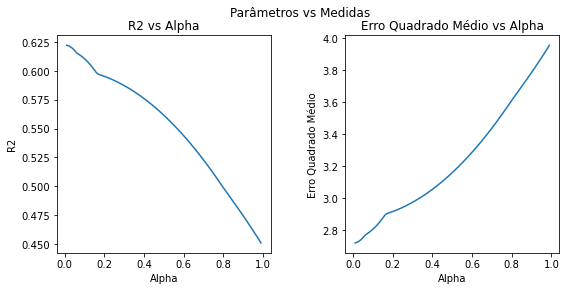

In [19]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_alpha'], resultados['mean_test_R2'])
axs[0].set(xlabel='Alpha', ylabel='R2',
       title='R2 vs Alpha')
axs[0].set_title('R2 vs Alpha')
axs[1].plot(resultados['param_alpha'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='Alpha', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs Alpha')
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

* Mesmo plot anterior só que com menor escala no eixo X para observar as variações nesta com melhor zoom
    * Cada pequeno aumento do hiperparâmetro resulta na reduçao do R2 e aumento do erro

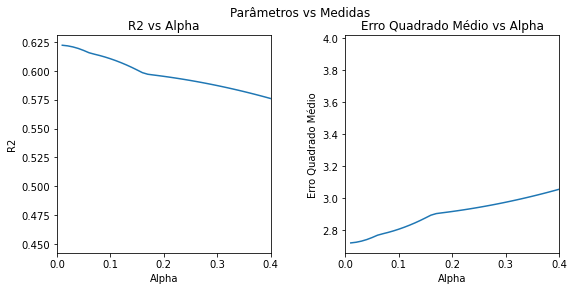

In [20]:
fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(resultados['param_alpha'], resultados['mean_test_R2'])
axs[0].set(xlabel='Alpha', ylabel='R2',
       title='R2 vs Alpha')
axs[0].set_title('R2 vs Alpha')
axs[1].plot(resultados['param_alpha'], abs(resultados['mean_test_Erro Quadrado médio']))
axs[1].set(xlabel='Alpha', ylabel='Erro Quadrado Médio',
       title='Erro Quadrado Médio vs Alpha')
axs[0].set_xlim(0,0.4)
axs[1].set_xlim(0,0.4)
fig.suptitle('Parâmetros vs Medidas') 
plt.subplots_adjust(wspace=0.35,hspace=1)

* Identificando como os coeficientes das variáveis variam conforme os valores de hiperparâmetros testados
    * Inicialmente inserindo estes em um dataframe

In [21]:
dados = pd.DataFrame(columns=['alpha','expectativa_anos_estudo','indice_gini','prop_pobreza_extrema','indice_freq_escolar'])
for x in np.arange(0.01, 5,0.01):
    lasso = Lasso(alpha = x,max_iter=100000,random_state=0)
    lasso.fit(X_train,y_train)
    dados =  dados.append({'alpha' : x, 'expectativa_anos_estudo' : lasso.coef_[0], 
                           'indice_gini' : lasso.coef_[1],
                            'prop_pobreza_extrema' : lasso.coef_[2], 
                           'indice_freq_escolar' : lasso.coef_[3]}, ignore_index = True)

In [22]:
dados.head()

,alpha,expectativa_anos_estudo,indice_gini,prop_pobreza_extrema,indice_freq_escolar
0,0.01,-0.246326,0.422656,-1.889222,0.759513
1,0.02,-0.199050,0.395129,-1.873750,0.708803
2,0.03,-0.151719,0.367632,-1.858366,0.658001
3,0.04,-0.104393,0.340132,-1.842974,0.607206
4,0.05,-0.057083,0.312623,-1.827556,0.556439


* Plotar como os coeficientes variam conforme os valores de hiperparâmetros testados

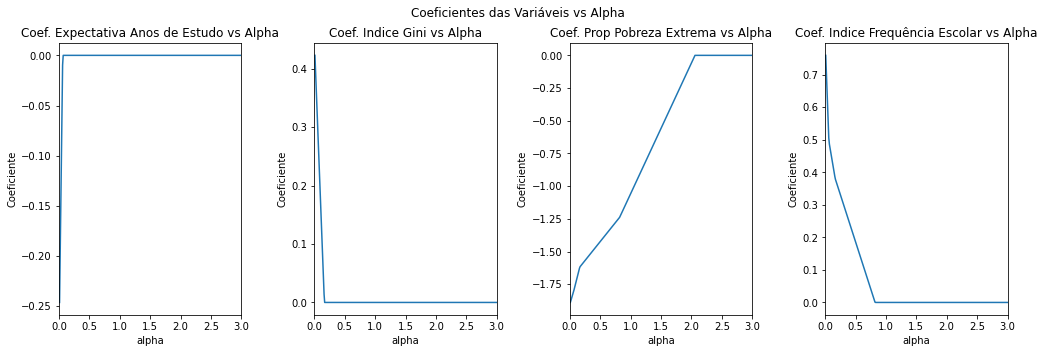

In [23]:
fig, axs = plt.subplots(1,4, figsize=(17,5))
axs[0].plot(dados['alpha'], dados['expectativa_anos_estudo'])
axs[0].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Expectativa Anos de Estudo vs Alpha')
axs[1].plot(dados['alpha'], dados['indice_gini'])
axs[1].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Indice Gini vs Alpha')
axs[2].plot(dados['alpha'], dados['prop_pobreza_extrema'])
axs[2].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Prop Pobreza Extrema vs Alpha')
axs[3].plot(dados['alpha'], dados['indice_freq_escolar'])
axs[3].set(xlabel='alpha', ylabel='Coeficiente',
       title='Coef. Indice Frequência Escolar vs Alpha')
fig.suptitle('Coeficientes das Variáveis vs Alpha')
axs[0].set_xlim(0,3)
axs[1].set_xlim(0,3)
axs[2].set_xlim(0,3)
axs[3].set_xlim(0,3)
plt.subplots_adjust(wspace=0.4,hspace=0.2)
# Coeficientes das variáveis de expectativa de anos de estudo e indice gini são zeradas com pequenos valores do hiperparâmetro
# Assim, a contribuição marginal destas não são tão significativas para o poder de predição do modelo
# A variável de proporção de pobreza extrema é a mais significativa para a predição, dado que seu coeficiente só zera com 
# hiperparâmetro próximo a 2

* Coeficientes das variáveis considerando o melhor ajuste de hiperparâmetro

In [24]:
lasso = Lasso(alpha = 0.01,max_iter=10000,random_state=0)
lasso.fit(X_train,y_train)
lasso.coef_

array([-0.246326  ,  0.42265566, -1.88922227,  0.75951309])

* Normalizar as variáveis da base de teste considerando a média e desvio padrão do conjunto de treino

In [25]:
X_test['expectativa_anos_estudo'] = (X_test['expectativa_anos_estudo'] - M1)/ D1
X_test['indice_gini'] = (X_test['indice_gini'] - M2)/ D2
X_test['prop_pobreza_extrema'] = (X_test['prop_pobreza_extrema'] - M3)/ D3
X_test['indice_frequencia_escolar'] = (X_test['indice_frequencia_escolar'] - M4)/ D4

* Aplicar o modelo na base de teste, calculando o R2 e Erro Médio nesta

In [26]:
previsoes = lasso.predict(X_test)
erro = mean_squared_error(y_test, previsoes)
print("Erro Quadrado Médio:", erro)
r2 = r2_score(y_test, previsoes)
print("R2:", r2)

Erro Quadrado Médio: 2.8041958518300096
R2: 0.6058090239814166


*  Executar uma previsão considerando uma hipotética nova observação

In [27]:
novos_dados = {'expectativa_anos_estudo': [7],
               'indice_gini': [0.4],
             'prop_pobreza_extrema':[15],
              'indice_frequencia_escolar':[0.5]}
novos_dados = pd.DataFrame(data=novos_dados)
novos_dados['expectativa_anos_estudo'] = (novos_dados['expectativa_anos_estudo'] - M1)/ D1
novos_dados['indice_gini'] = (novos_dados['indice_gini'] - M2)/ D2
novos_dados['prop_pobreza_extrema'] = (novos_dados['prop_pobreza_extrema'] - M3)/ D3
novos_dados['indice_frequencia_escolar'] = (novos_dados['indice_frequencia_escolar'] - M4)/ D4
novas_previsoes = lasso.predict(novos_dados)

In [28]:
novas_previsoes

array([71.13021908])

* Verificar o comportamento dos erros (valores reais vs valores previstos)

In [29]:
erros = pd.DataFrame(columns=['real','previsto'])

In [30]:
for x,y in zip(previsoes,y_test['expectativa_vida']):
    erros = erros.append({'real': x, 'previsto': y}, ignore_index=True)

In [31]:
erros['erro'] = erros['real'] - erros['previsto']

* Histograma dos erros
    * Os erros situam-se em torno de zero

<AxesSubplot:>

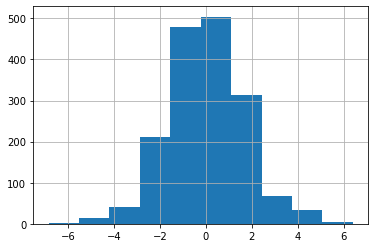

In [32]:
erros['erro'].hist()

<AxesSubplot:xlabel='erro'>

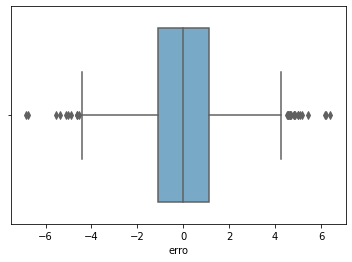

In [33]:
sns.boxplot(x=erros["erro"], palette="Blues")

* Os 90% centrais dos erros estão em até 2

In [34]:
erros['erro'].quantile([.1,.25,.5,.75,0.9])

0.10   -1.991853
0.25   -1.109387
0.50    0.003255
0.75    1.100772
0.90    2.012696
Name: erro, dtype: float64